In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\manik\\OneDrive\\Documents\\Data_sets\\SaYoPillow.csv")

print(df.head())

      sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0


In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64


In [7]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
               sr          rr          t          lm          bo         rem  \
count  630.000000  630.000000  630.00000  630.000000  630.000000  630.000000   
mean    71.600000   21.800000   92.80000   11.700000   90.900000   88.500000   
std     19.372833    3.966111    3.52969    4.299629    3.902483   11.893747   
min     45.000000   16.000000   85.00000    4.000000   82.000000   60.000000   
25%     52.500000   18.500000   90.50000    8.500000   88.500000   81.250000   
50%     70.000000   21.000000   93.00000   11.000000   91.000000   90.000000   
75%     91.250000   25.000000   95.50000   15.750000   94.250000   98.750000   
max    100.000000   30.000000   99.00000   19.000000   97.000000  105.000000   

             sr.1          hr          sl  
count  630.000000  630.000000  630.000000  
mean     3.700000   64.500000    2.000000  
std      3.054572    9.915277    1.415337  
min      0.000000   50.000000    0.000000  
25%      0.500000   56.250000    1.0000

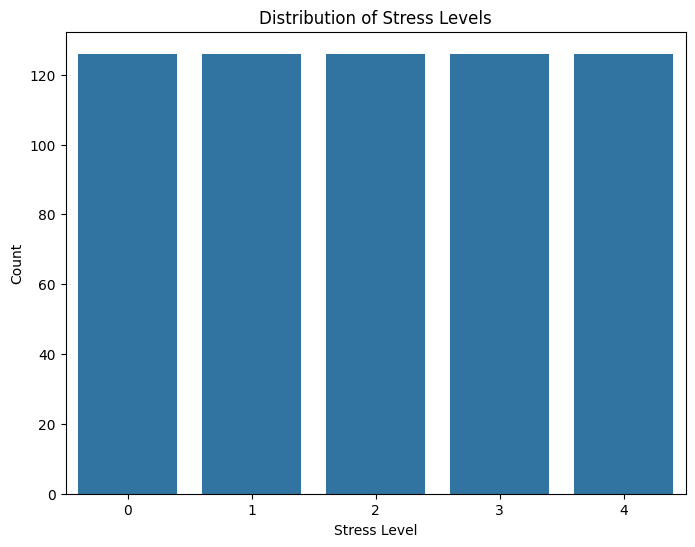

In [8]:
# Distribution of stress levels
plt.figure(figsize=(8, 6))
sns.countplot(x='sl', data=df)
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

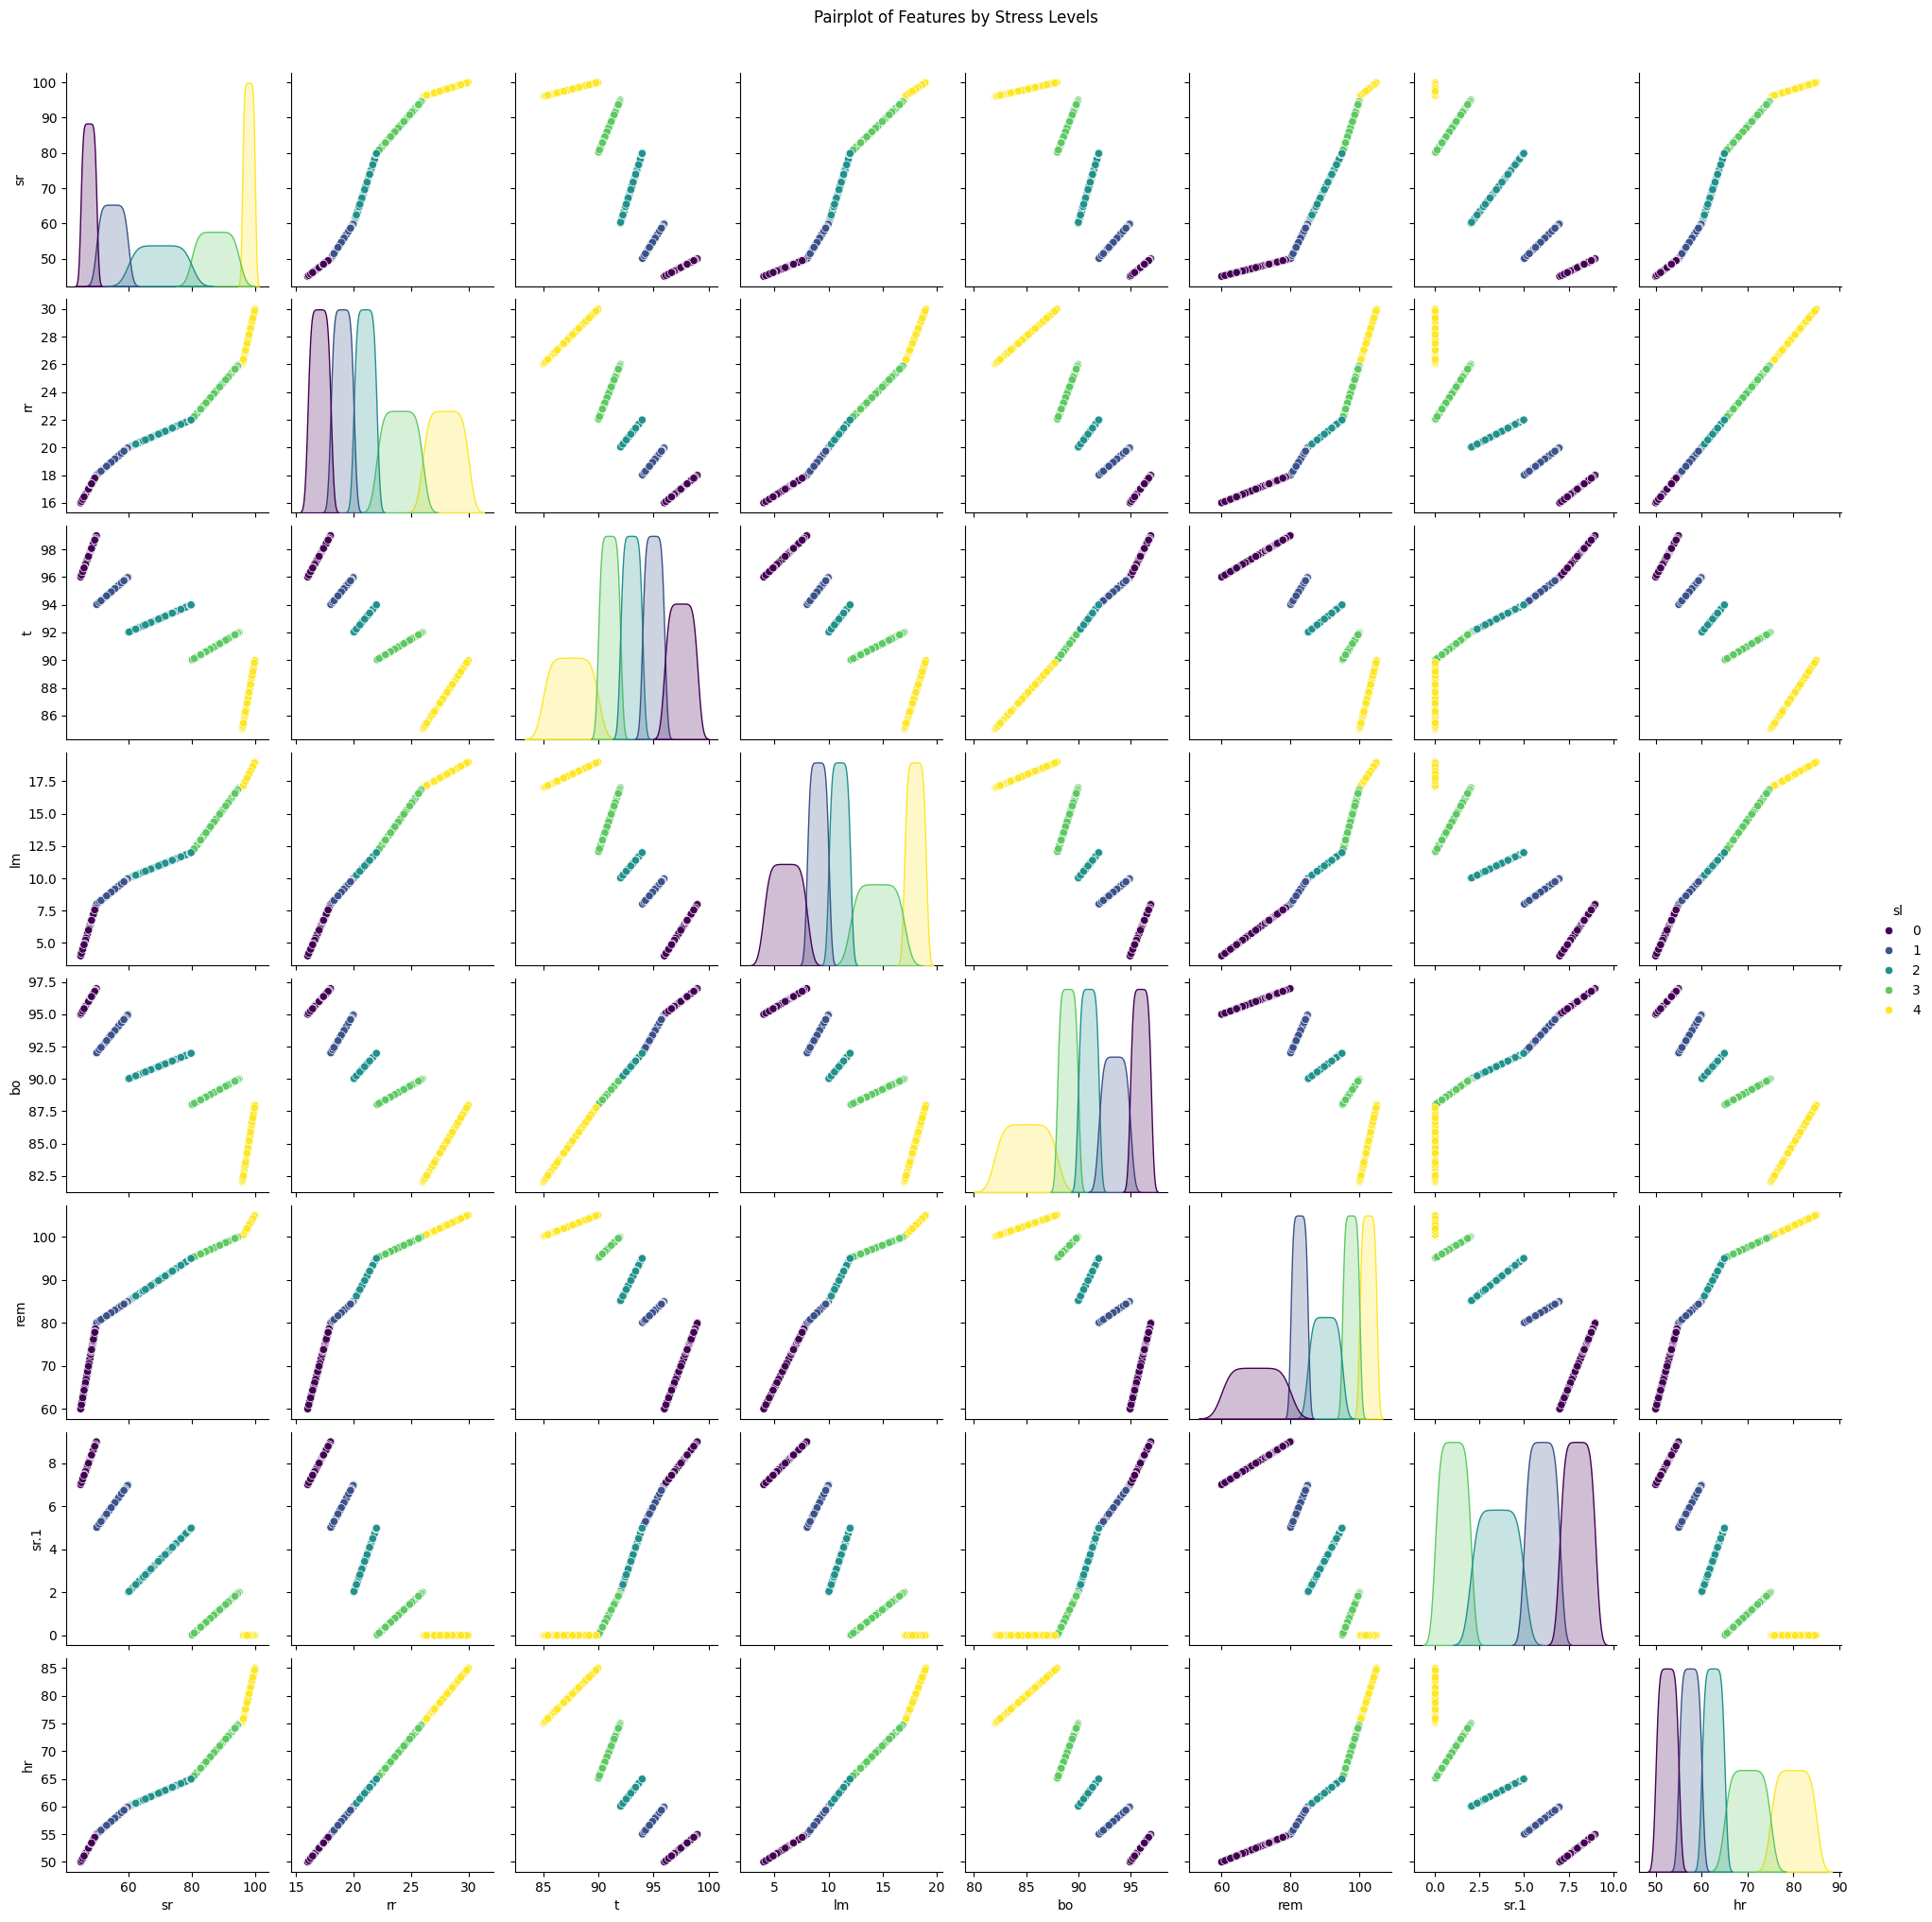

In [9]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='sl', palette='viridis')
plt.suptitle('Pairplot of Features by Stress Levels', y=1.02)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

# dependent and independent variables
x = df.drop('sl', axis=1)
y = df['sl']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(x_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(x_test_scaled)

In [12]:
# Evaluate the model
Accuracy: 1.0
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [13]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



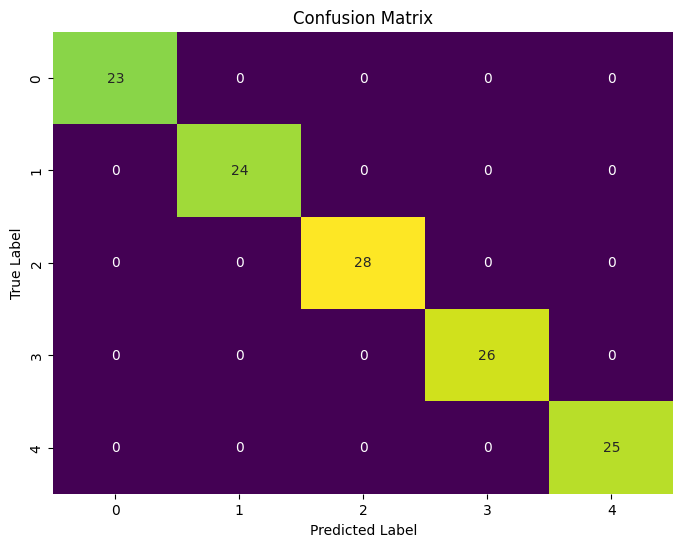

In [14]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
model.predict([[48.12 , 17.248 , 97.872 , 6.496 , 96.248 , 72.48 , 8.248 , 53.12]])

array([0])

In [16]:
#deploying the model

import joblib

# Save the model to a file
joblib.dump(model, 'model.pkl')

# Load the model from the file
loaded_model = joblib.load('model.pkl')